In [15]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline    

In [16]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")

In [17]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:])

In [4]:
print(train_set_x_orig)

[[[[ 17  31  56]
   [ 22  33  59]
   [ 25  35  62]
   ..., 
   [  1  28  57]
   [  1  26  56]
   [  1  22  51]]

  [[ 25  36  62]
   [ 28  38  64]
   [ 30  40  67]
   ..., 
   [  1  27  56]
   [  1  25  55]
   [  2  21  51]]

  [[ 32  40  67]
   [ 34  42  69]
   [ 35  42  70]
   ..., 
   [  1  25  55]
   [  0  24  54]
   [  1  21  51]]

  ..., 
  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ..., 
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ..., 
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ..., 
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[196 192 190]
   [193 186 182]
   [188 179 174]
   ..., 
   [ 90 142 200]
   [ 90 142 201]
   [ 90 142 201]]

  [[230 229 229]
   [204 199 197]
   [193 186 181]
   ..., 
   [ 91 143 201]
   [ 91 143 201]
   [ 91 143 201]]

  [[232 225 224]
   [235 234 234]
   [208 205 202]
   ..., 
   [ 91 144 202]
   [ 91 1

In [6]:
print(train_set_x_orig.shape)

(209, 64, 64, 3)


In [8]:
print(train_set_x_orig.shape[1])

64


In [14]:
for key in train_dataset.keys():  
    print("name: "+ train_dataset[key].name)  
    print("shape :" +str(train_dataset[key].shape))
    print("value: "+ str(train_dataset[key].value))

name: /list_classes
shape :(2,)
value: [b'non-cat' b'cat']
name: /train_set_x
shape :(209, 64, 64, 3)
value: [[[[ 17  31  56]
   [ 22  33  59]
   [ 25  35  62]
   ..., 
   [  1  28  57]
   [  1  26  56]
   [  1  22  51]]

  [[ 25  36  62]
   [ 28  38  64]
   [ 30  40  67]
   ..., 
   [  1  27  56]
   [  1  25  55]
   [  2  21  51]]

  [[ 32  40  67]
   [ 34  42  69]
   [ 35  42  70]
   ..., 
   [  1  25  55]
   [  0  24  54]
   [  1  21  51]]

  ..., 
  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ..., 
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ..., 
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ..., 
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[196 192 190]
   [193 186 182]
   [188 179 174]
   ..., 
   [ 90 142 200]
   [ 90 142 201]
   [ 90 142 201]]

  [[230 229 229]
   [204 199 197]
   [193 186 181]
   ..., 
   [ 91 143 201]
   [ 91 143 2

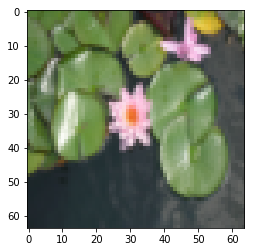

In [23]:
plt.imshow(train_set_x_orig[26])

In [22]:
print(train_set_x_orig[25])

[[[15 15  5]
  [17 17  6]
  [17 17  7]
  ..., 
  [ 1  1  0]
  [ 1  1  1]
  [ 1  1  1]]

 [[16 16  5]
  [18 17  6]
  [19 18  9]
  ..., 
  [ 1  1  0]
  [ 1  1  1]
  [ 1  1  1]]

 [[16 16  6]
  [18 17  8]
  [21 19  9]
  ..., 
  [ 1  1  1]
  [ 1  1  0]
  [ 2  2  1]]

 ..., 
 [[16 21 18]
  [22 27 24]
  [29 35 33]
  ..., 
  [ 0  1  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[16 20 16]
  [22 29 25]
  [29 35 32]
  ..., 
  [ 1  3  1]
  [ 0  1  0]
  [ 0  0  0]]

 [[14 19 14]
  [21 29 25]
  [31 37 33]
  ..., 
  [ 2  4  2]
  [ 1  2  1]
  [ 0  0  0]]]


In [24]:
cities={
    '北京':{
        '朝阳':['国贸','CBD','天阶','我爱我家','链接地产'],
        '海淀':['圆明园','苏州街','中关村','北京大学'],
        '昌平':['沙河','南口','小汤山',],
        '怀柔':['桃花','梅花','大山'],
        '密云':['密云A','密云B','密云C']
    },
    '河北':{
        '石家庄':['石家庄A','石家庄B','石家庄C','石家庄D','石家庄E'],
        '张家口':['张家口A','张家口B','张家口C'],
        '承德':['承德A','承德B','承德C','承德D']
    }
}

In [44]:
for a in cities["北京"][:]:
    print(a)

TypeError: unhashable type: 'slice'

In [34]:
print(a,i)

NameError: name 'i' is not defined

In [47]:
print(train_set_x_orig.dtype)

uint8


In [48]:
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:])

In [62]:
print(np.array(test_dataset["list_classes"][:]))

[b'non-cat' b'cat']


In [42]:
#[1.1.1.1.1.1.]+[1.4.2.5.3.6.]=[2.5.3.6.4.7.]

import tensorflow as tf
import numpy as np

with tf.Session() as sess:
    input1 = tf.constant(1.0, shape = [2,3])
    input2 = tf.constant(np.reshape(np.arange(1,7,dtype=np.float32), (2,3)))
    output = tf.add(input1,input2)
    print(sess.run(output))
    #result = output.eval()
#result

[[ 2.  3.  4.]
 [ 5.  6.  7.]]


In [40]:
import numpy as np
np.array(range(1,7))

array([1, 2, 3, 4, 5, 6])

In [44]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]

In [45]:
#@title Raw fields

raw_input = None #@param {type:"raw"}
raw_dropdown = raw_input #@param [1, "raw_input", "False", "'string'"] {type:"raw"}

print(raw_input)
print(raw_dropdown)

None
None


In [72]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp

alist = [54,26,93,17,77,31,44,55,20]
bubbleSort(alist)
print(alist)

[17, 26, 31, 44, 54, 55, 77, 20, 93]


In [80]:

s = [13,5,9,55,98,2,6]
#6[5,9,13,55,2,6,98]
#5[5,9,13,2,6,.. ..]55,98
#4[5,9,2,6,.. ...]13,55,98
#3[5,2,6,..,...]9,13,55,98
#2[2,5,..,...]6,9,13,55,98
for x in range(len(s)-1,0,-1):
    print(x)
    for q in range(x):
        print(q)
   
    

6
0
1
2
3
4
5
5
0
1
2
3
4
4
0
1
2
3
3
0
1
2
2
0
1
1
0


In [ ]:
for q in range()

In [74]:

def bubbleSort(slist):
    for i in range(len(slist)-1,0,-1):
        #print(i)
        for y in range(i):
            print(y)
            if s[y] > s[y+1]:
                temp = s[y+1]
                s[y+1] = s[y]
                s[y] = temp

s = [13,5,9,55,98,2,6]
bubbleSort(s)            
print(s)                


0
1
2
3
4
5
0
1
2
3
4
0
1
2
3
0
1
2
0
1
0
[2, 5, 6, 9, 13, 55, 98]


In [82]:
#               max20             93
#alist = [54,26,93,17,77,31,44,55,20]  8...0
def selectionSort(alist):
   for i in range(len(alist)-1,0,-1): #8 7 6 5 4 3 2 1 0
       maxPosition=0  
       for location in range(1,i+1): #1..8, 1..7
           if alist[location]>alist[maxPosition]:
               maxPosition = location #2

       temp = alist[i]
       alist[i] = alist[maxPosition]
       alist[maxPosition] = temp

alist = [54,26,93,17,77,31,44,55,20]
selectionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [85]:
def bubbleSort(b):
    for i in range(len(b)-1,0,-1):
        for j in range(i):
            if b[j] > b[j+1]:
                temp = b[j]
                b[j] = b[j+1]
                b[j+1] = temp
b = [9,1,34,6,2,55,3,19]
bubbleSort(b)
print(b)

[1, 2, 3, 6, 9, 19, 34, 55]


In [ ]:
def selectionSort(s):
    for i in range(len(s)-1,0,-1):
        maxPosition = 0
        for j in range(1, i+1):
            if s[j] > s[maxPosition]:
                maxPosition = j
       temp = s[j]
       
        